# Food Classification

### Imports

In [ ]:
import torch
from torch import nn
import zipfile
from pathlib import Path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

### Setting up device agnostic code

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Getting data

In [21]:
zip_data = Path('../data/processed/baklava_churros_cheesecake.zip')
extracted_data = Path('../data/processed/baklava_churros_cheesecake')

with zipfile.ZipFile(zip_data, 'r') as zip:
    print('Unzipping dataset')
    zip.extractall(extracted_data)

Unzipping dataset


### Exploring data

In [22]:
def walk_through_dir(dir_path):
    '''
    Walks through the given directory and prints information about its contents.

    Args:
        dir_path (str): Path to the target directory.

    Prints:
        For each directory in the tree rooted at dir_path:
          - Number of subdirectories
          - Number of files
          - Directory path
    '''
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [23]:
walk_through_dir(extracted_data)

There are 2 directories and 0 images in '..\data\processed\baklava_churros_cheesecake'.
There are 3 directories and 0 images in '..\data\processed\baklava_churros_cheesecake\test'.
There are 0 directories and 46 images in '..\data\processed\baklava_churros_cheesecake\test\baklava'.
There are 0 directories and 58 images in '..\data\processed\baklava_churros_cheesecake\test\cheesecake'.
There are 0 directories and 46 images in '..\data\processed\baklava_churros_cheesecake\test\churros'.
There are 3 directories and 0 images in '..\data\processed\baklava_churros_cheesecake\train'.
There are 0 directories and 154 images in '..\data\processed\baklava_churros_cheesecake\train\baklava'.
There are 0 directories and 146 images in '..\data\processed\baklava_churros_cheesecake\train\cheesecake'.
There are 0 directories and 150 images in '..\data\processed\baklava_churros_cheesecake\train\churros'.


#### Visualizing an image

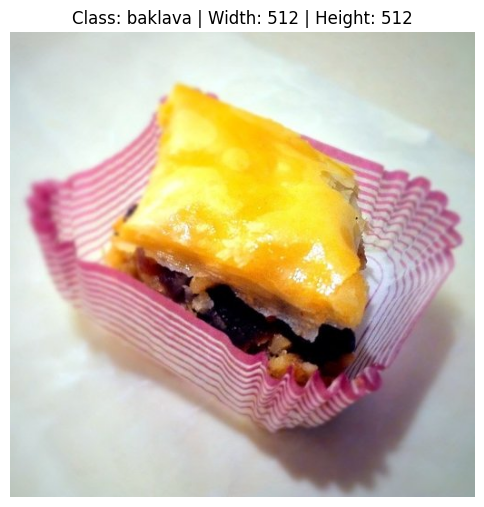

In [30]:
image_paths_list = list(extracted_data.glob('*/*/*.jpg'))
image_path = image_paths_list[0]
image_class = image_path.parent.stem

img = Image.open(image_path)
img_as_array = np.asarray(img)

plt.figure(figsize=(6, 8))
plt.imshow(img_as_array)
plt.title(f'Class: {image_class} | Width: {img.width} | Height: {img.height}')
plt.axis(False)
plt.show()